Mesh generation using diff point distribution.


In [1]:
# General and plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.tri as tri

# Random sampling and Poisson disk sampling
from scipy.stats import qmc
from scipy.spatial import Delaunay

# semiuniform sampling
import pyvista as pv
import tetgen

#Uniform sampling
import meshzoo


def plot_pyvista(nodes, simplices):
    buf = np.empty((len(simplices), 1), pv.ID_TYPE)
    buf[:] = 4
    elements = np.hstack((buf, simplices))
    elements = elements.flatten()
    cell_type = np.empty(len(simplices), dtype='uint8')
    cell_type[:] = 10

    grid = pv.UnstructuredGrid(elements, cell_type, nodes)
    #grid = tgen.grid

    # get cell centroid
    
    #esta linea es maldita
    #cambia la dimension de los elementos de 1d a 2d n,5.
    # los copia al arreglo cells y le saca primera columna que corresponde al número de vértices
    cells = grid.cells.reshape(-1, 5)[:, 1:]
    #esta wea dado los indices de los vértices de cada celda,
    #obtiene las coordenadas de los vértices y calcula su promedio
    cell_center = grid.points[cells].mean(1)

    # extract cells below the 0 xy plane
    mask = cell_center[:, 2] < 0.5
    cell_ind = mask.nonzero()[0]
    subgrid = grid.extract_cells(cell_ind)
    # advanced plotting
    plotter = pv.Plotter(notebook=True)
    plotter.background_color = 'white'
    plotter.add_mesh(subgrid, 'lightgrey', lighting=True, show_edges=True)
    plotter.add_mesh(pv.Cube(center=(0.5, 0.5, 0.5)), 'r', 'wireframe')
    #plotter.add_legend([[' Input Mesh ', 'r'], [' Tessellated Mesh ', 'black']])
    plotter.show(jupyter_backend='static')

#Move a point to the boundary of the box if the distante to the boundary is less than tolerance
def move_point(max_number, xPoint , yPoint, zPoint, tolerance):
    r =  np.random.uniform(0, 1)
    n = max_number
    # A esta wea la faltan dos casos,pero no sé me ocurren como hacerlo ahora
    if r <= 0.5:
        #if the x coord is near the extreme x coord
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        #if the y coord is near the extreme y coord
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        #if the z coord is near the extreme z coord
        if zPoint >= max_number*(1.0-tolerance):
            zPoint = n
        #if the x coord is near the 0-x coord
        if xPoint <= max_number*tolerance: 
            xPoint = 0
        #if the y coord is near the 0-y coord
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        #if the z coord is near the 0-z coord
        if zPoint <= max_number*tolerance:
            zPoint = 0
    else:
        #if the x coord is near the 0-x coord
        if xPoint <= max_number*tolerance: 
            xPoint = 0            
        #if the y coord is near the 0-y coord
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        #if the z coord is near the 0-z coord  
        if zPoint <= max_number*tolerance:
            zPoint = 0
        #if the x coord is near the extreme x coord
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        #if the y coord is near the extreme y coord
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        #if the z coord is near the extreme z coord
        if zPoint >= max_number*(1.0-tolerance):
            zPoint = n
        

    #print("returning", xPoint, yPoint)
    return (xPoint, yPoint, zPoint)

def add_box(arr, tolerance):
    box = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
    arr = np.append(arr, box, axis=0)
    np.unique(arr, axis=0)
    #maxNumber = max(max(arr[:,0]), max(arr[:,1]), max(arr[:,2]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], arr[i,2], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
        arr[i,2] = new_p[2]
    return arr

In [2]:
# 500
tolerance = 0.1 # max distance from the boundary
numVertices = 2000 #Random points
radius = 0.105 #Poisson
areaMax = 0.0008 #Semiuniform
lnspace = 8 # Uniform sqrt(500)

## Generate random points

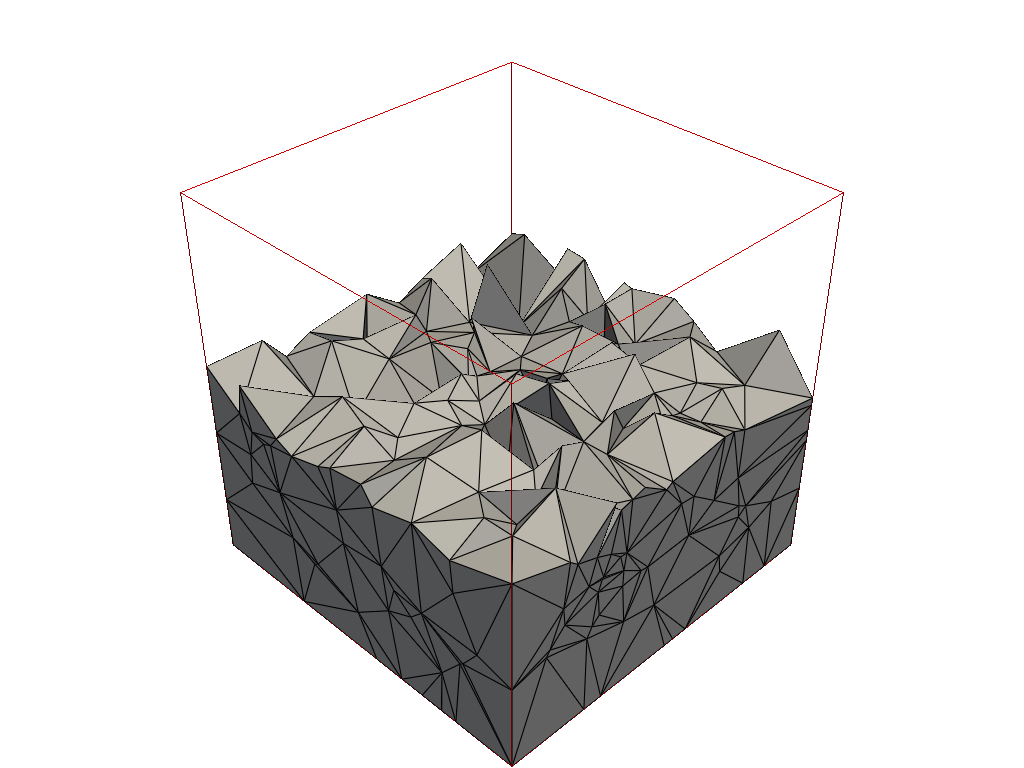

1000


In [3]:
RandomSample = np.random.rand(numVertices - 8,3)
RandomSample = add_box(RandomSample, tolerance)

randomDelaunay = Delaunay(RandomSample)

plot_pyvista(randomDelaunay.points , randomDelaunay.simplices)

print(len( randomDelaunay.points))

# Generate poisson points

Number of points:  532


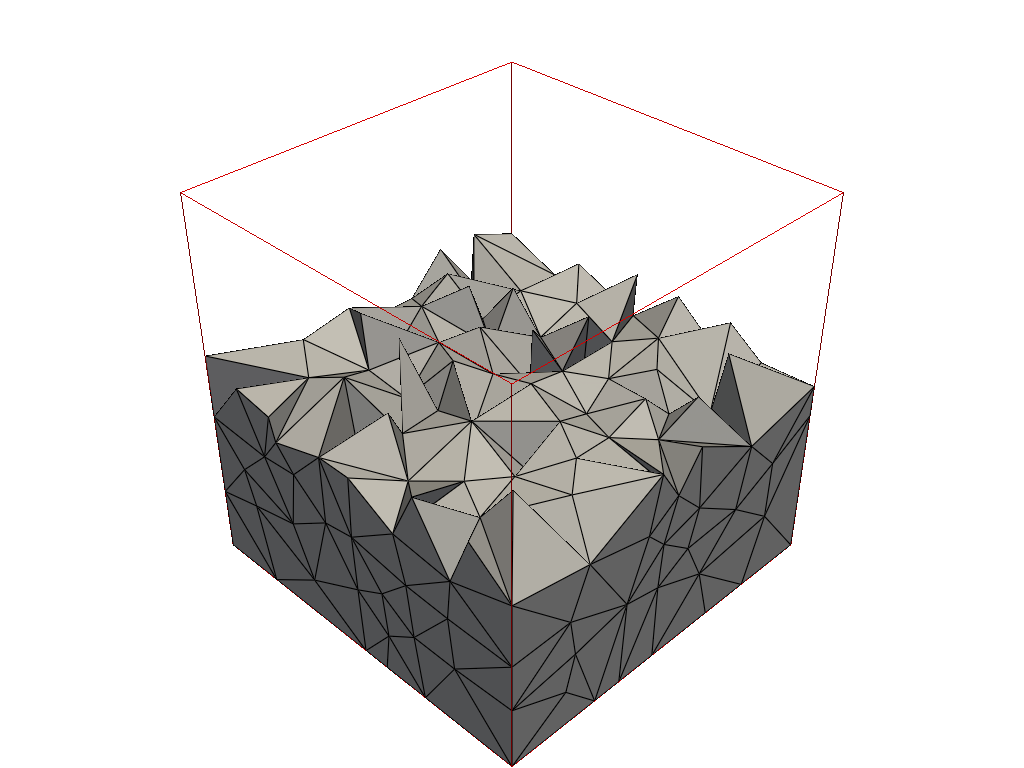

In [4]:
rng = np.random.default_rng()
engine = qmc.PoissonDisk(d=3, radius=radius, seed=rng)
sample = engine.fill_space()

sample = add_box(sample, tolerance)
poissonTriangulation = Delaunay(sample)

poissonPoints = sample
poissonTriangles = poissonTriangulation.simplices.copy()

print("Number of points: ", len(poissonPoints))
plot_pyvista(poissonPoints, poissonTriangulation.simplices)

## Simiuniform mesh

Delaunizing vertices...
Delaunay seconds:  0.000317
Creating surface mesh ...
Surface mesh seconds:  0.000977
Recovering boundaries...
Boundary recovery seconds:  0.004597
Removing exterior tetrahedra ...
Exterior tets removal seconds:  2.2e-05
Recovering Delaunayness...
Delaunay recovery seconds:  5e-05
Refining mesh...
  10 insertions, added 4 points, 44 tetrahedra in queue.
  3 insertions, added 2 points, 55 tetrahedra in queue.
  4 insertions, added 2 points, 76 tetrahedra in queue.
  5 insertions, added 3 points, 100 tetrahedra in queue.
  7 insertions, added 5 points, 127 tetrahedra in queue.
  9 insertions, added 6 points, 196 tetrahedra in queue.
  12 insertions, added 9 points, 307 tetrahedra in queue.
  16 insertions, added 10 points, 447 tetrahedra in queue.
  21 insertions, added 14 points, 660 tetrahedra in queue.
  28 insertions, added 18 points, 851 tetrahedra in queue.
  38 insertions, added 24 points, 1198 tetrahedra in queue.
  50 insertions, added 30 points, 1649 tet

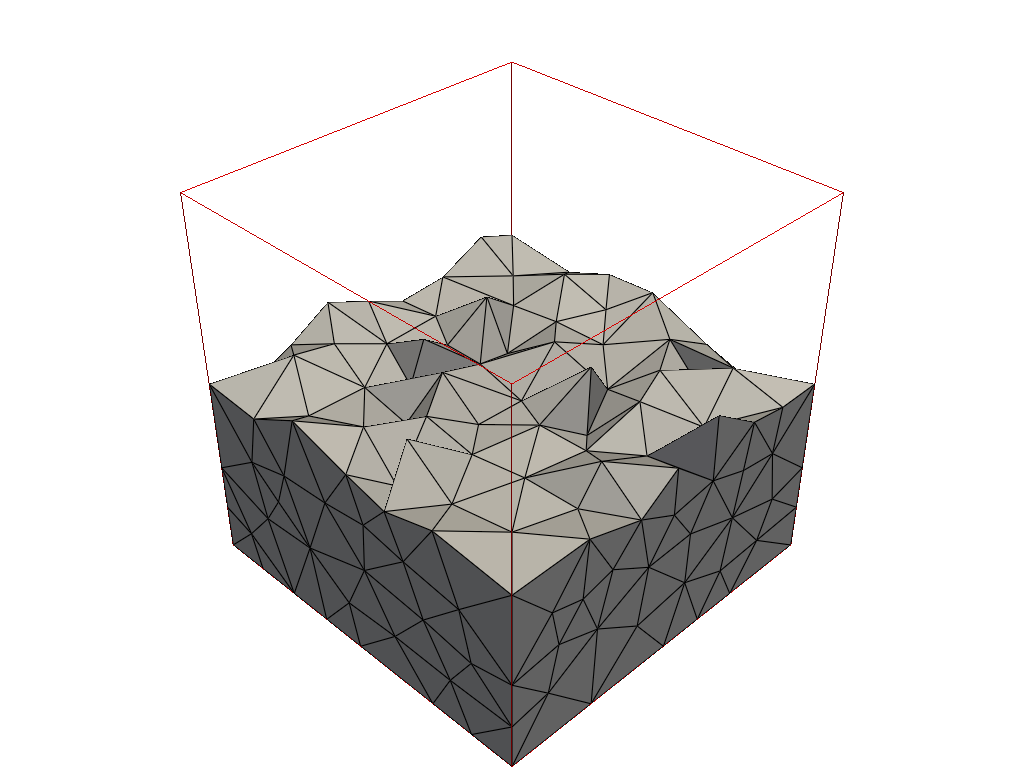

number of simplices:  513


In [5]:
v = np.array([[0, 0, 0], [1, 0, 0],
                  [1, 1, 0], [0, 1, 0],
                  [0, 0, 1], [1, 0, 1],
                  [1, 1, 1], [0, 1, 1],])
f = np.vstack([[0, 1, 2], [2, 3, 0],
                   [0, 1, 5], [5, 4, 0],
                   [1, 2, 6], [6, 5, 1],
                   [2, 3, 7], [7, 6, 2],
                   [3, 0, 4], [4, 7, 3],
                   [4, 5, 6], [6, 7, 4]])
tgen = tetgen.TetGen(v, f)
SemiUniformPoints, SemiUniformTriangles = tgen.tetrahedralize(switches="pqa" + str(areaMax))
plot_pyvista(SemiUniformPoints, SemiUniformTriangles)
print("number of simplices: ", len(SemiUniformPoints))

## Uniform grid

In [14]:

# import meshzoo
# UniformPoints, UniformTriangles = meshzoo.cube_tetra(
#     np.linspace(0.0, 1.0, lnspace), np.linspace(0.0, 1.0, lnspace), np.linspace(0.0, 1.0, lnspace)
# )

# plot_pyvista(UniformPoints, UniformTriangles)

# print("Number of points: ", len(UniformPoints))


You're creating a mesh with more than 100 for which a MeshPro license is required. See https://github.com/meshpro for details.



Error: Unable to find valid license for MeshPro. 

Add a license with

    plm add <your-license-key>

AttributeError: 'tuple' object has no attribute 'tb_frame'

# Generate mesh files

In [6]:
#Num of vertices and simplices
print(len(randomDelaunay.points), len(randomDelaunay.simplices))
print(len(poissonPoints), len(poissonTriangles))
print(len(SemiUniformPoints), len(SemiUniformTriangles))
#print(len(UniformPoints), len(UniformTriangles))


import meshio
#writte .node files
meshio.write_points_cells(str(numVertices) + "random.node", randomDelaunay.points, [("tetra", randomDelaunay.simplices)])
meshio.write_points_cells(str(numVertices) + "poisson.node", poissonPoints, [("tetra", poissonTriangles)])
meshio.write_points_cells(str(numVertices) + "semiuniform.node", SemiUniformPoints, [("tetra", SemiUniformTriangles)])
#meshio.write_points_cells(str(numVertices) + "uniform.node", UniformPoints, [("tetra", UniformTriangles)])



1000 4836
532 2405
513 2227


## Call to tetgen

In [8]:
import os

os.system("tetgen -fznn " + str(numVertices) + "random.node")
os.system("tetgen -fzenn " + str(numVertices) + "poisson.node")
os.system("tetgen -fzenn " + str(numVertices) + "semiuniform.node")
#os.system("tetgen -fzenn " + str(numVertices) + "uniform.node")

Opening 1000random.node.
Delaunizing vertices...
Delaunay seconds:  0.006032
Jettisoning redundant points.

Writing 1000random.1.node.
Writing 1000random.1.ele.
Writing 1000random.1.face.
Writing 1000random.1.edge.
Writing 1000random.1.neigh.

Output seconds:  0.012532
Total running seconds:  0.018674

Statistics:

  Input points: 1000

  Mesh points: 996
  Mesh tetrahedra: 4836
  Mesh faces: 10161
  Mesh edges: 6320
  Convex hull faces: 978

Opening 1000poisson.node.
Delaunizing vertices...
Delaunay seconds:  0.002294
Jettisoning redundant points.

Writing 1000poisson.1.node.
Writing 1000poisson.1.ele.
Writing 1000poisson.1.face.
Writing 1000poisson.1.edge.
Writing 1000poisson.1.neigh.

Output seconds:  0.005799
Total running seconds:  0.008149

Statistics:

  Input points: 532

  Mesh points: 526
  Mesh tetrahedra: 2405
  Mesh faces: 5095
  Mesh edges: 3215
  Convex hull faces: 570

Opening 1000semiuniform.node.
Delaunizing vertices...
Delaunay seconds:  0.002043

Writing 1000semiuni

0